In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("ctenohystrica_out_iqtree_HKY_G5.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n211         1.6469 ( 1.5538,  1.7867) ( 1.5450,  1.7687)  0.2236 (Jnode 418)\n',
 't_n212         0.6073 ( 0.5961,  0.6193) ( 0.5955,  0.6187)  0.0231 (Jnode 417)\n',
 't_n213         0.5371 ( 0.4902,  0.5752) ( 0.4945,  0.5785)  0.0840 (Jnode 416)\n',
 't_n214         0.4187 ( 0.4003,  0.4369) ( 0.4003,  0.4369)  0.0365 (Jnode 415)\n',
 't_n215         0.3749 ( 0.3589,  0.3914) ( 0.3587,  0.3912)  0.0325 (Jnode 414)\n',
 't_n216         0.3685 ( 0.3526,  0.3854) ( 0.3523,  0.3850)  0.0328 (Jnode 413)\n',
 't_n217         0.3410 ( 0.3238,  0.3594) ( 0.3236,  0.3588)  0.0352 (Jnode 412)\n',
 't_n218         0.2481 ( 0.2252,  0.2709) ( 0.2261,  0.2715)  0.0454 (Jnode 411)\n',
 't_n219         0.2409 ( 0.2185,  0.2635) ( 0.2201,  0.2649)  0.0449 (Jnode 410)\n',
 't_n220         0.1961 ( 0.1717,  0.2200) ( 0.1724,  0.2205)  0.0482 (Jnode 409)\n',
 't_n221         0.1929 ( 0.1687,  0.2163) ( 0.1686,  0.2161)  0.0476 (Jnode 408)\n',
 't_n222         0.1885 ( 0.1644,  0.2123) ( 0.1640,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n211',
 't_n212',
 't_n213',
 't_n214',
 't_n215',
 't_n216',
 't_n217',
 't_n218',
 't_n219',
 't_n220',
 't_n221',
 't_n222',
 't_n223',
 't_n224',
 't_n225',
 't_n226',
 't_n227',
 't_n228',
 't_n229',
 't_n230',
 't_n231',
 't_n232',
 't_n233',
 't_n234',
 't_n235',
 't_n236',
 't_n237',
 't_n238',
 't_n239',
 't_n240',
 't_n241',
 't_n242',
 't_n243',
 't_n244',
 't_n245',
 't_n246',
 't_n247',
 't_n248',
 't_n249',
 't_n250',
 't_n251',
 't_n252',
 't_n253',
 't_n254',
 't_n255',
 't_n256',
 't_n257',
 't_n258',
 't_n259',
 't_n260',
 't_n261',
 't_n262',
 't_n263',
 't_n264',
 't_n265',
 't_n266',
 't_n267',
 't_n268',
 't_n269',
 't_n270',
 't_n271',
 't_n272',
 't_n273',
 't_n274',
 't_n275',
 't_n276',
 't_n277',
 't_n278',
 't_n279',
 't_n280',
 't_n281',
 't_n282',
 't_n283',
 't_n284',
 't_n285',
 't_n286',
 't_n287',
 't_n288',
 't_n289',
 't_n290',
 't_n291',
 't_n292',
 't_n293',
 't_n294',
 't_n295',
 't_n296',
 't_n297',
 't_n298',
 't_n299',
 't_n300',
 't_n301',

In [6]:
posterior_mean_iqtree

[1.6469,
 0.6073,
 0.5371,
 0.4187,
 0.3749,
 0.3685,
 0.341,
 0.2481,
 0.2409,
 0.1961,
 0.1929,
 0.1885,
 0.1362,
 0.0984,
 0.057,
 0.0435,
 0.0305,
 0.02,
 0.0296,
 0.1783,
 0.1377,
 0.1292,
 0.082,
 0.0539,
 0.0348,
 0.0756,
 0.0498,
 0.0046,
 0.0751,
 0.1816,
 0.1745,
 0.1675,
 0.1594,
 0.1437,
 0.0609,
 0.1298,
 0.1247,
 0.0299,
 0.1256,
 0.1213,
 0.111,
 0.0668,
 0.0634,
 0.0555,
 0.0518,
 0.0383,
 0.0313,
 0.013,
 0.0004,
 0.0231,
 0.0106,
 0.0615,
 0.1038,
 0.0925,
 0.0412,
 0.1144,
 0.0714,
 0.0626,
 0.056,
 0.0505,
 0.0054,
 0.0185,
 0.1737,
 0.0632,
 0.0081,
 0.0452,
 0.0305,
 0.0236,
 0.0199,
 0.1598,
 0.1446,
 0.1029,
 0.0779,
 0.07,
 0.0586,
 0.0339,
 0.0614,
 0.0515,
 0.2162,
 0.1158,
 0.074,
 0.0728,
 0.0674,
 0.053,
 0.0067,
 0.0378,
 0.0105,
 0.0072,
 0.0499,
 0.011,
 0.0085,
 0.0705,
 0.0601,
 0.0557,
 0.0427,
 0.0279,
 0.0177,
 0.0603,
 0.0504,
 0.0167,
 0.0287,
 0.0238,
 0.0152,
 0.0087,
 0.0433,
 0.0369,
 0.0239,
 0.0149,
 0.0173,
 0.0273,
 0.0701,
 0.0467,
 0.00

In [7]:
lower_ci_iqtree

[1.5538,
 0.5961,
 0.4902,
 0.4003,
 0.3589,
 0.3526,
 0.3238,
 0.2252,
 0.2185,
 0.1717,
 0.1687,
 0.1644,
 0.1085,
 0.0715,
 0.0369,
 0.0252,
 0.0169,
 0.0097,
 0.0164,
 0.1538,
 0.1129,
 0.1046,
 0.0596,
 0.028,
 0.0198,
 0.0548,
 0.0315,
 0.0015,
 0.0514,
 0.1575,
 0.1501,
 0.1426,
 0.1349,
 0.118,
 0.0357,
 0.1053,
 0.1,
 0.0172,
 0.1029,
 0.0991,
 0.09,
 0.0511,
 0.0484,
 0.0418,
 0.0391,
 0.0267,
 0.0207,
 0.0069,
 0.0,
 0.0147,
 0.0057,
 0.0433,
 0.0743,
 0.0641,
 0.0242,
 0.0822,
 0.0508,
 0.0437,
 0.0363,
 0.0319,
 0.0005,
 0.0069,
 0.1494,
 0.0416,
 0.0024,
 0.0268,
 0.0172,
 0.0125,
 0.0101,
 0.136,
 0.1189,
 0.0794,
 0.0587,
 0.0531,
 0.0409,
 0.0225,
 0.0448,
 0.0331,
 0.194,
 0.0974,
 0.0612,
 0.0599,
 0.0543,
 0.0395,
 0.0018,
 0.0264,
 0.0043,
 0.0022,
 0.0369,
 0.0056,
 0.0038,
 0.0579,
 0.0488,
 0.0439,
 0.0317,
 0.0188,
 0.0106,
 0.048,
 0.0373,
 0.0084,
 0.0182,
 0.0142,
 0.008,
 0.0036,
 0.0314,
 0.0261,
 0.0143,
 0.007,
 0.0084,
 0.0167,
 0.0561,
 0.0315,
 0.0016

In [8]:
upper_ci_iqtree

[1.7867,
 0.6193,
 0.5752,
 0.4369,
 0.3914,
 0.3854,
 0.3594,
 0.2709,
 0.2635,
 0.22,
 0.2163,
 0.2123,
 0.1626,
 0.1247,
 0.0776,
 0.063,
 0.0456,
 0.0318,
 0.047,
 0.2026,
 0.1642,
 0.1564,
 0.1111,
 0.0812,
 0.0556,
 0.103,
 0.0712,
 0.0099,
 0.1068,
 0.2056,
 0.1992,
 0.1924,
 0.1852,
 0.1706,
 0.0878,
 0.1564,
 0.1515,
 0.0464,
 0.1513,
 0.1466,
 0.1358,
 0.0842,
 0.0804,
 0.0717,
 0.0671,
 0.0523,
 0.044,
 0.0213,
 0.0014,
 0.0345,
 0.0177,
 0.0813,
 0.1328,
 0.1221,
 0.0634,
 0.144,
 0.0948,
 0.0835,
 0.078,
 0.0724,
 0.0163,
 0.0362,
 0.1976,
 0.0876,
 0.0176,
 0.0683,
 0.0481,
 0.0384,
 0.0329,
 0.1832,
 0.1697,
 0.1272,
 0.1021,
 0.0864,
 0.0762,
 0.0469,
 0.0777,
 0.0694,
 0.2389,
 0.1344,
 0.0888,
 0.0877,
 0.0821,
 0.0686,
 0.015,
 0.0518,
 0.0192,
 0.0144,
 0.0646,
 0.0182,
 0.0151,
 0.0852,
 0.0734,
 0.0693,
 0.0555,
 0.0391,
 0.027,
 0.0744,
 0.0648,
 0.0274,
 0.041,
 0.0355,
 0.0247,
 0.0161,
 0.0564,
 0.0498,
 0.0359,
 0.0256,
 0.0286,
 0.0401,
 0.0856,
 0.0633,
 0.

In [9]:
file_mcmctree = open("ctenohystrica_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

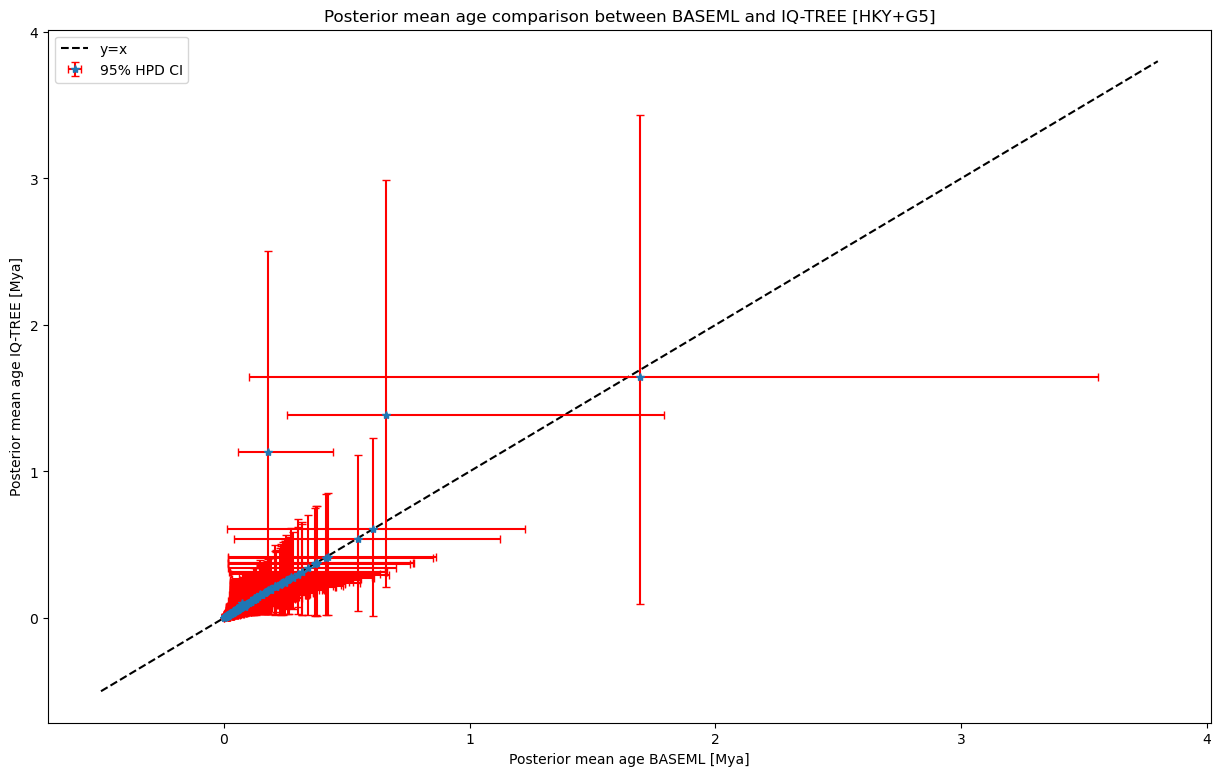

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.5,3.8], 
        [-0.5, 3.8], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Ctenohystrica/Ctenohystrica_posterior_mean_age_comparison_HKY_G5.png')

In [11]:
posterior_mean_baseml

[1.6911,
 0.607,
 0.5447,
 0.4218,
 0.3777,
 0.3712,
 0.3418,
 0.2421,
 0.2339,
 0.1887,
 0.1858,
 0.1811,
 0.1296,
 0.0915,
 0.0515,
 0.0379,
 0.025,
 0.0156,
 0.0265,
 0.1708,
 0.1305,
 0.1224,
 0.0746,
 0.0498,
 0.0279,
 0.084,
 0.0497,
 0.0046,
 0.0677,
 0.1745,
 0.1678,
 0.1613,
 0.1544,
 0.1405,
 0.0531,
 0.1268,
 0.1225,
 0.0274,
 0.1215,
 0.117,
 0.107,
 0.0633,
 0.0599,
 0.0524,
 0.0487,
 0.0368,
 0.0305,
 0.0124,
 0.0003,
 0.0203,
 0.009,
 0.0567,
 0.1015,
 0.0932,
 0.0399,
 0.1104,
 0.0674,
 0.0589,
 0.05,
 0.0448,
 0.0045,
 0.0159,
 0.1673,
 0.0564,
 0.0059,
 0.0386,
 0.0275,
 0.0211,
 0.0179,
 0.1531,
 0.1381,
 0.0972,
 0.0727,
 0.0644,
 0.0534,
 0.0304,
 0.0564,
 0.0473,
 0.2096,
 0.1112,
 0.0697,
 0.0688,
 0.0638,
 0.0509,
 0.0053,
 0.0367,
 0.011,
 0.0074,
 0.0463,
 0.0105,
 0.0079,
 0.0671,
 0.0571,
 0.0516,
 0.0399,
 0.0266,
 0.0156,
 0.0545,
 0.0473,
 0.0154,
 0.0274,
 0.0225,
 0.015,
 0.0088,
 0.0398,
 0.0335,
 0.0218,
 0.0145,
 0.0144,
 0.0246,
 0.0669,
 0.0444,
 0

In [12]:
posterior_mean_iqtree

[1.6469,
 0.6073,
 0.5371,
 0.4187,
 0.3749,
 0.3685,
 0.341,
 0.2481,
 0.2409,
 0.1961,
 0.1929,
 0.1885,
 0.1362,
 0.0984,
 0.057,
 0.0435,
 0.0305,
 0.02,
 0.0296,
 0.1783,
 0.1377,
 0.1292,
 0.082,
 0.0539,
 0.0348,
 0.0756,
 0.0498,
 0.0046,
 0.0751,
 0.1816,
 0.1745,
 0.1675,
 0.1594,
 0.1437,
 0.0609,
 0.1298,
 0.1247,
 0.0299,
 0.1256,
 0.1213,
 0.111,
 0.0668,
 0.0634,
 0.0555,
 0.0518,
 0.0383,
 0.0313,
 0.013,
 0.0004,
 0.0231,
 0.0106,
 0.0615,
 0.1038,
 0.0925,
 0.0412,
 0.1144,
 0.0714,
 0.0626,
 0.056,
 0.0505,
 0.0054,
 0.0185,
 0.1737,
 0.0632,
 0.0081,
 0.0452,
 0.0305,
 0.0236,
 0.0199,
 0.1598,
 0.1446,
 0.1029,
 0.0779,
 0.07,
 0.0586,
 0.0339,
 0.0614,
 0.0515,
 0.2162,
 0.1158,
 0.074,
 0.0728,
 0.0674,
 0.053,
 0.0067,
 0.0378,
 0.0105,
 0.0072,
 0.0499,
 0.011,
 0.0085,
 0.0705,
 0.0601,
 0.0557,
 0.0427,
 0.0279,
 0.0177,
 0.0603,
 0.0504,
 0.0167,
 0.0287,
 0.0238,
 0.0152,
 0.0087,
 0.0433,
 0.0369,
 0.0239,
 0.0149,
 0.0173,
 0.0273,
 0.0701,
 0.0467,
 0.00

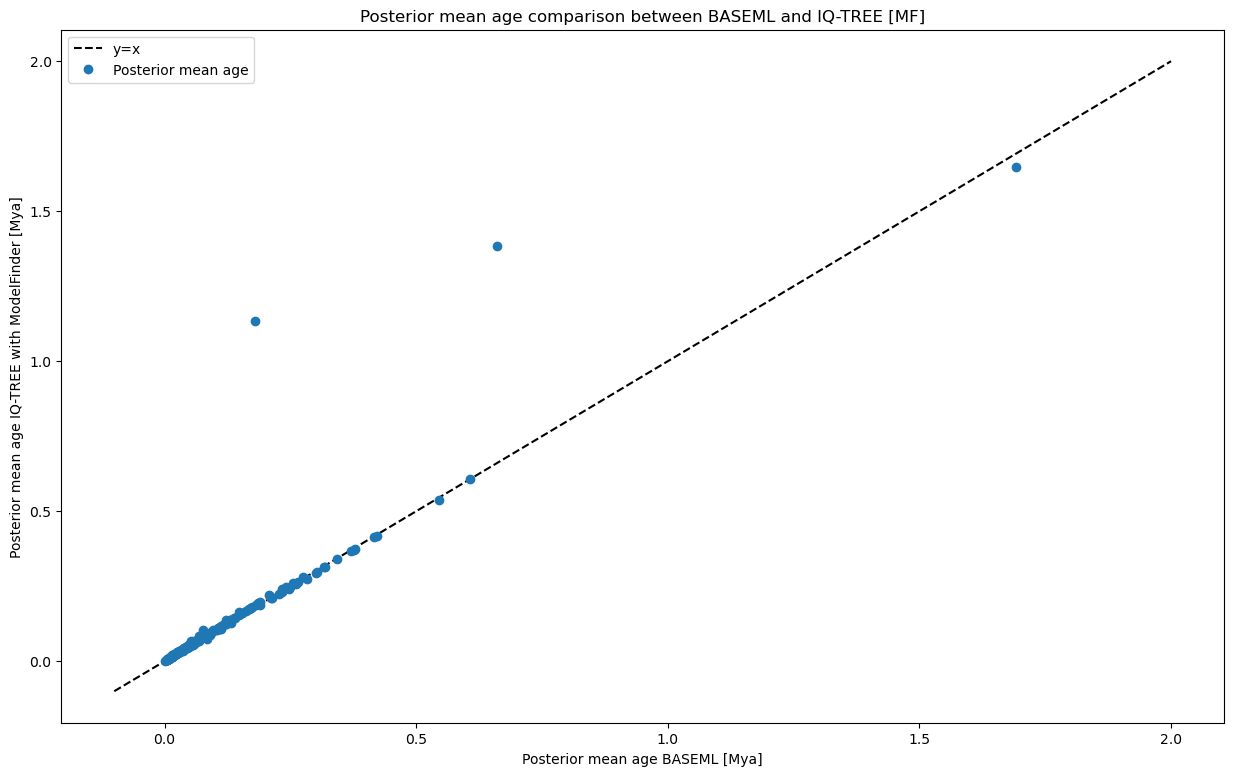

In [14]:
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Ctenohystrica/Ctenohystrica_posterior_mean_age_comparison_HKY_G5_scatter.png')